# Trend

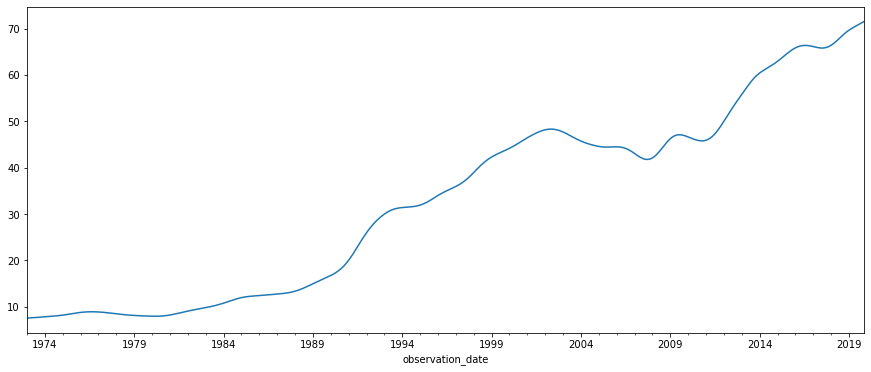

In [1]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_excel(r'C:\Users\ASUS\Desktop\ML TEMPLETES\hands-on-time-series-analylsis-python-master\Data\India_Exchange_Rate_Dataset.xls',
index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

In [2]:
df

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


# Detrending Using Pandas Differencing

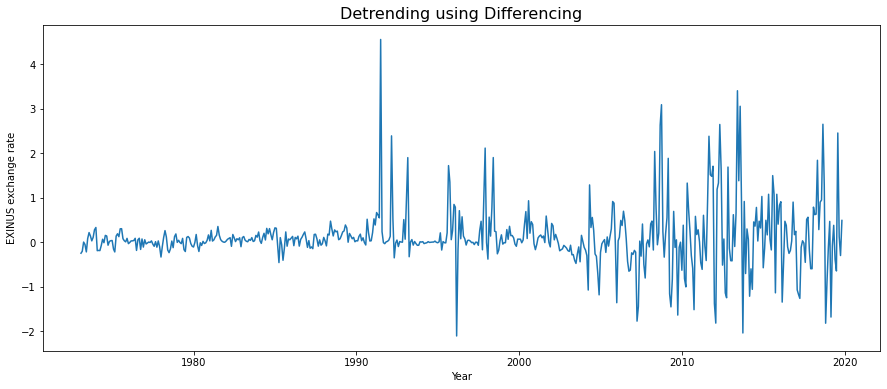

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
diff = df.EXINUS.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Detrending Using a SciPy Signal

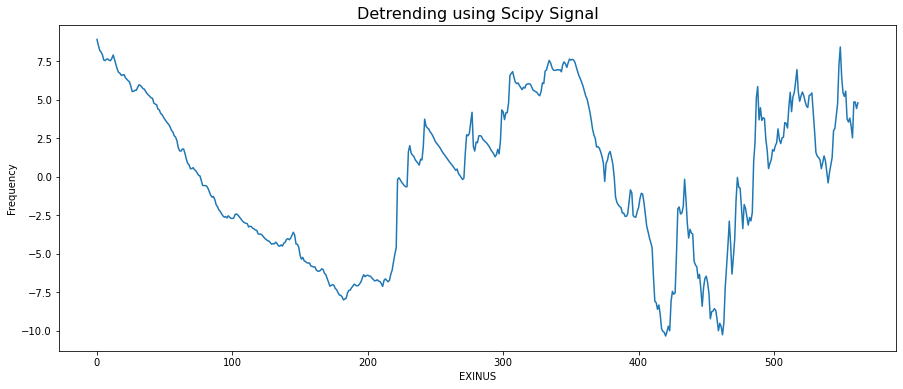

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

# Detrend Using an HP Filter

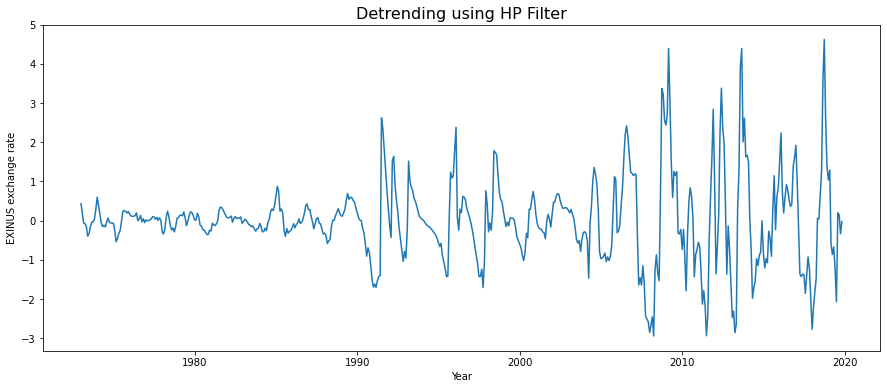

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended = df.EXINUS - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Seasonality

Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of time. It is a characteristic of economics, weather, and stock market time-series data; less often, it’s observed in scientific data. In other industries, many phenomena are characterized by periodically recurring seasonal effects. For example, retail sales tend to increase during Christmas and decrease afterward.
The following methods can be used to detect seasonality:

•Multiple box plots
•Autocorrelation plots


# Autocorrelation plots

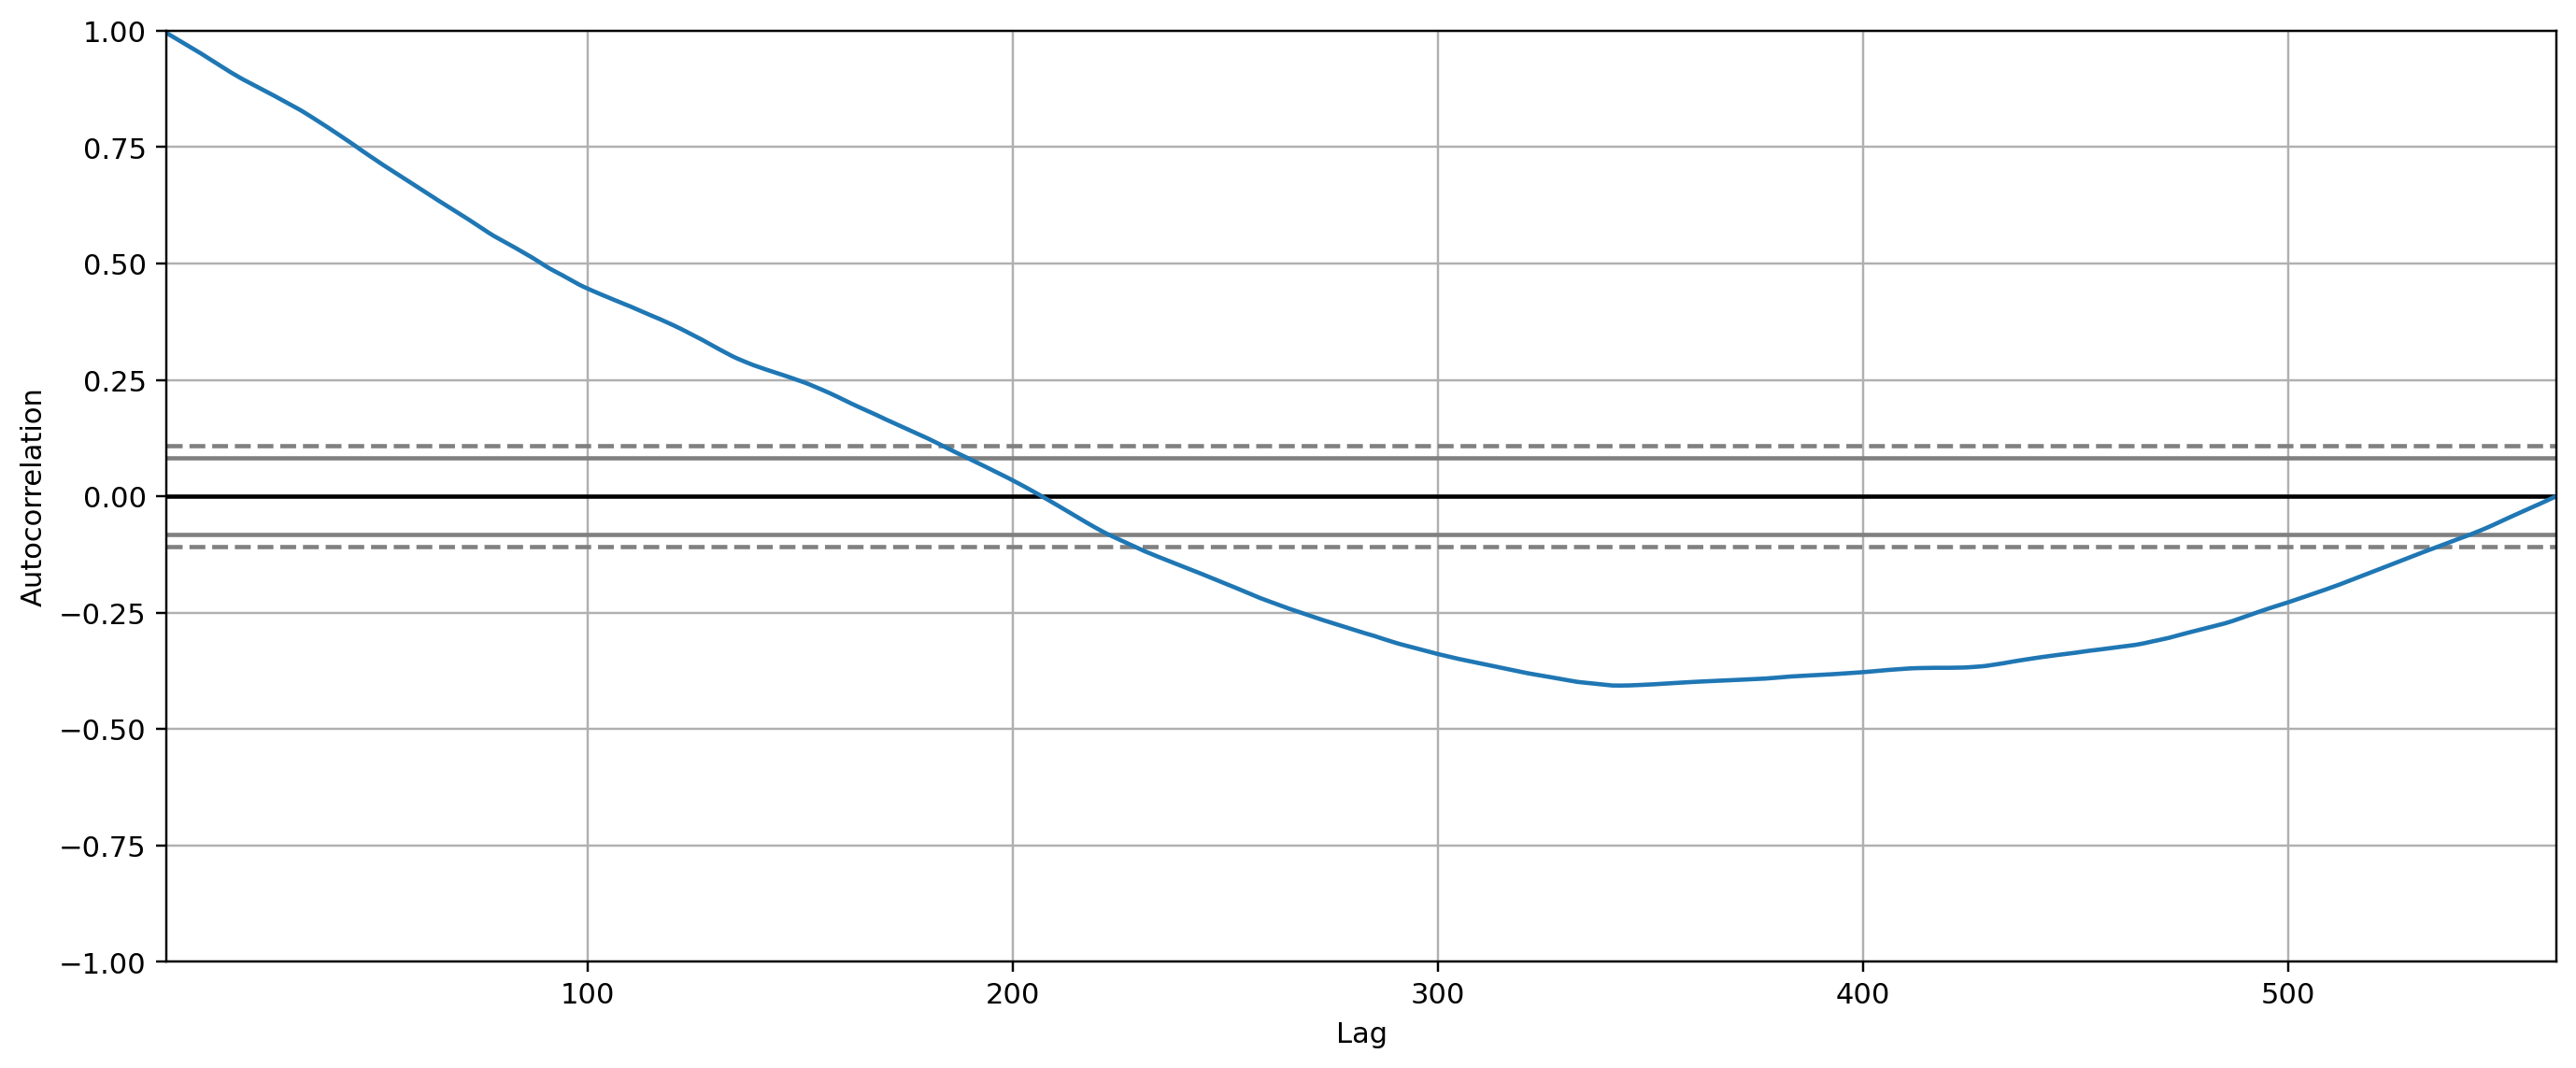

In [6]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df.EXINUS.tolist())


# Seasonal Decomposition

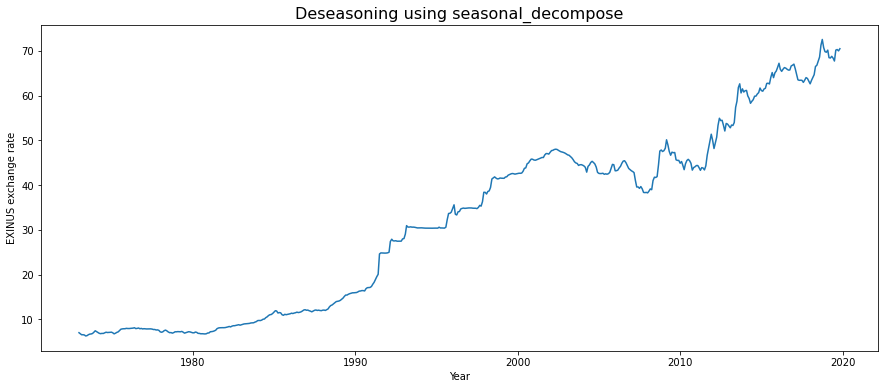

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative', extrapolate_trend='freq')
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Detecting Cyclical Variations

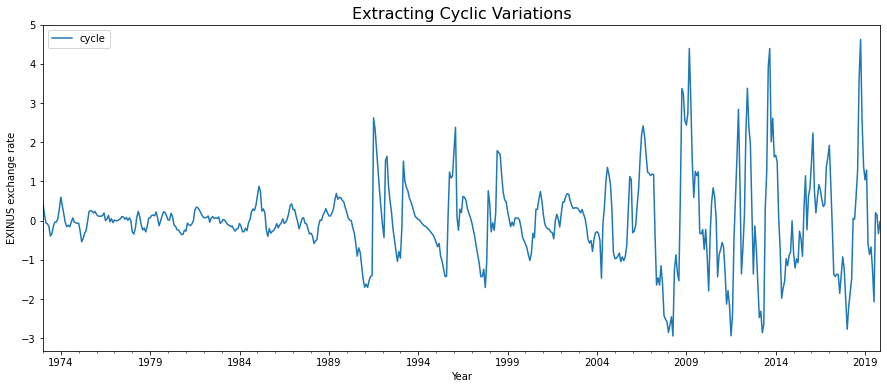

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'C:\Users\ASUS\Desktop\ML TEMPLETES\hands-on-time-series-analylsis-python-master\Data\India_Exchange_Rate_Dataset.xls',
index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['cycle'] =EXINUS_cycle
df['trend'] =EXINUS_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Decomposing a Time Series into Its Components

 Decomposition  is a method used to isolate the time-series data into different elements such as trends, seasonality, cyclic variance, and residuals. We can leverage seasonal decomposition from a stats model to decompose the data into its constituent parts, considering series as additive or multiplicative.

•Trends(T(t)) means an increase or decrease in the value of ts data.
•Seasonality(S[t]) means repeating a short-term cycle of ts data.
•Cyclic variations(c[t]) means a fluctuation in long trends of ts data.
•Residuals(e[t]) means an irregular variation of ts data.

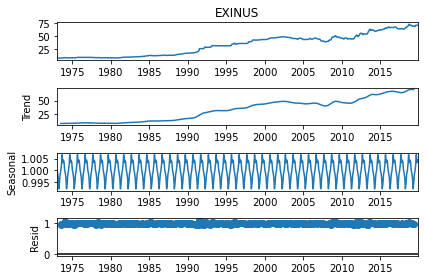

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
result = seasonal_decompose(df['EXINUS'], model='mul') 
result.plot();